## Import required libraries

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
os.chdir('/Users/abdullahkhan/Desktop/Traffic_Signs_WebApp-master')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
pip install sklearn

## Store data, labels in the list

In [34]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [35]:
cur_path

'/Users/abdullahkhan/Desktop/Traffic_Signs_WebApp-master'

## Preprocess the images

In [49]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' obje

## Converting lists into numpy arrays

In [ ]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [ ]:
os.mkdir('training1')

np.save('./training1/data',data)
np.save('./training/target',labels)

## Load data & Labels

In [ ]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [ ]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Convert labels to onehot encoding

In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Now it's time to build the model

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20


ValueError: in user code:

    File "/Users/abdullahkhan/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/abdullahkhan/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/abdullahkhan/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/abdullahkhan/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/Users/abdullahkhan/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/abdullahkhan/opt/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 150, 150, 3), found shape=(None, 30, 30, 3)


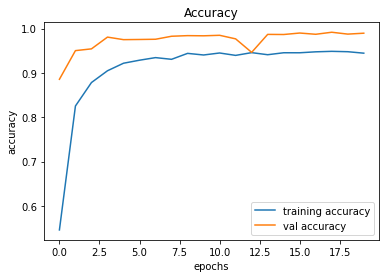

In [ ]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

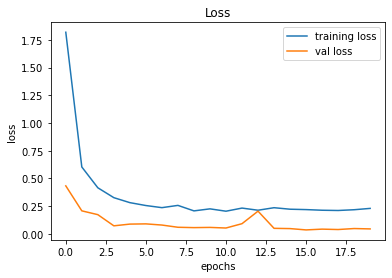

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

In [ ]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [ ]:
X_test, label = testing('Test.csv')

In [ ]:
Y_pred = np.argmax(model.predict(X_test), axis=-1)
Y_pred

395/395 [==============================] - 7s 16ms/step


array([16,  1, 38, ...,  5,  7, 10])

## Accuracy with the test data

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9575613618368963


## Save the model

In [ ]:
model.save("./training/TSR.h5")

## Load the Model

In [59]:
import os
os.chdir(r'/Users/abdullahkhan/Desktop/Traffic_Signs_WebApp-master')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [60]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [61]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    return image,Y_pred

In [7]:
plot,prediction = test_on_img(r'/Users/abdullahkhan/Desktop/Traffic_Signs_WebApp-master/Test/children.jpeg')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

NameError: name 'test_on_img' is not defined